In [2]:
import pandas as pd
import json

In [3]:
with open('D:\\AI Assignments\\Assignment3\\Part3\\final_json.json',encoding="utf8") as file:
            df = pd.DataFrame(json.load(file))

In [4]:
df.head()

,amazon_score_mixed,amazon_score_negative,amazon_score_neutral,amazon_score_positive,amazon_sentiments_label,azure_api_label,azure_api_score,google_sentiment_label,google_sentiment_magnitude,google_sentiment_socre,ibm_score,ibm_sentiments_label,sentiment,text
0,0.001549,0.000533,0.750581,0.247337,neutral,positive,0.978328,positive,1.1,0.2,0.816136,positive,positive,"Thank you. Good afternoon, everyone. And welco..."
1,0.009229,0.006072,0.880566,0.104133,neutral,neutral,0.500000,positive,1.4,0.2,0.558518,positive,positive,"As we look past Q1, we expect the channel inve..."
2,0.000831,0.008268,0.980631,0.010270,neutral,neutral,0.500000,neutral,0.0,0.0,0.000000,neutral,neutral,And your last question comes from the line of ...
3,0.011638,0.953385,0.034877,0.000099,negative,neutral,0.500000,negative,1.2,-0.3,-0.598559,negative,negative,"On the China gaming weakness, is it the slower..."
4,0.014957,0.000221,0.007328,0.977495,positive,positive,0.905933,positive,7.9,0.5,0.790615,positive,negative,"I don't know that we could tear that apart, te..."


In [5]:
df['amazon_sentiment_score'] = df[["amazon_score_negative","amazon_score_neutral","amazon_score_positive"]].max(axis=1)

In [6]:
df.head()

,amazon_score_mixed,amazon_score_negative,amazon_score_neutral,amazon_score_positive,amazon_sentiments_label,azure_api_label,azure_api_score,google_sentiment_label,google_sentiment_magnitude,google_sentiment_socre,ibm_score,ibm_sentiments_label,sentiment,text,amazon_sentiment_score
0,0.001549,0.000533,0.750581,0.247337,neutral,positive,0.978328,positive,1.1,0.2,0.816136,positive,positive,"Thank you. Good afternoon, everyone. And welco...",0.750581
1,0.009229,0.006072,0.880566,0.104133,neutral,neutral,0.500000,positive,1.4,0.2,0.558518,positive,positive,"As we look past Q1, we expect the channel inve...",0.880566
2,0.000831,0.008268,0.980631,0.010270,neutral,neutral,0.500000,neutral,0.0,0.0,0.000000,neutral,neutral,And your last question comes from the line of ...,0.980631
3,0.011638,0.953385,0.034877,0.000099,negative,neutral,0.500000,negative,1.2,-0.3,-0.598559,negative,negative,"On the China gaming weakness, is it the slower...",0.953385
4,0.014957,0.000221,0.007328,0.977495,positive,positive,0.905933,positive,7.9,0.5,0.790615,positive,negative,"I don't know that we could tear that apart, te...",0.977495


In [7]:
df = df.drop(columns =["amazon_score_negative","amazon_score_neutral","amazon_score_positive","amazon_score_mixed"])

In [8]:
df.head()

,amazon_sentiments_label,azure_api_label,azure_api_score,google_sentiment_label,google_sentiment_magnitude,google_sentiment_socre,ibm_score,ibm_sentiments_label,sentiment,text,amazon_sentiment_score
0,neutral,positive,0.978328,positive,1.1,0.2,0.816136,positive,positive,"Thank you. Good afternoon, everyone. And welco...",0.750581
1,neutral,neutral,0.500000,positive,1.4,0.2,0.558518,positive,positive,"As we look past Q1, we expect the channel inve...",0.880566
2,neutral,neutral,0.500000,neutral,0.0,0.0,0.000000,neutral,neutral,And your last question comes from the line of ...,0.980631
3,negative,neutral,0.500000,negative,1.2,-0.3,-0.598559,negative,negative,"On the China gaming weakness, is it the slower...",0.953385
4,positive,positive,0.905933,positive,7.9,0.5,0.790615,positive,negative,"I don't know that we could tear that apart, te...",0.977495


In [9]:
#Keeping only the columns we need for mapping the label we assigned it with the scores of all 4 API's. 
sentiment_df = df[['azure_api_score', 'google_sentiment_socre','ibm_score','amazon_sentiment_score','sentiment']]
sentiment_df.head()

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,sentiment
0,0.978328,0.2,0.816136,0.750581,positive
1,0.500000,0.2,0.558518,0.880566,positive
2,0.500000,0.0,0.000000,0.980631,neutral
3,0.500000,-0.3,-0.598559,0.953385,negative
4,0.905933,0.5,0.790615,0.977495,negative


In [10]:
sentiment_df = sentiment_df[sentiment_df.sentiment !='neutral']

In [11]:
sentiment_df.head()

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,sentiment
0,0.978328,0.2,0.816136,0.750581,positive
1,0.500000,0.2,0.558518,0.880566,positive
3,0.500000,-0.3,-0.598559,0.953385,negative
4,0.905933,0.5,0.790615,0.977495,negative
5,0.904133,0.0,0.988573,0.674756,positive


In [12]:
sentiment_df.to_json('D:\\AI Assignments\\Assignment3\\Part3\\AllAPI_sentiments_forh2o.json')

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sentiment_df['sentiment'] = le.fit_transform(sentiment_df['sentiment'])

In [113]:
sentiment_df.head()

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,sentiment
0,0.978328,0.2,0.816136,0.750581,1
1,0.500000,0.2,0.558518,0.880566,1
3,0.500000,-0.3,-0.598559,0.953385,0
4,0.905933,0.5,0.790615,0.977495,0
5,0.904133,0.0,0.988573,0.674756,1


In [114]:
sentiment_df.to_json('D:\\AI Assignments\\Assignment3\\Part3\\AllAPI_sentiments.json')

In [88]:
X = sentiment_df.iloc[:,:-1]
Y = sentiment_df.iloc[:,-1]
features = X.columns.values
features

array(['azure_api_score', 'google_sentiment_socre', 'ibm_score',
       'amazon_sentiment_score'], dtype=object)

In [89]:
X['Average Score'] = X.mean(axis = 1) 

In [90]:
X.head()

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,Average Score
0,0.978328,0.2,0.816136,0.750581,0.686261
1,0.500000,0.2,0.558518,0.880566,0.534771
3,0.500000,-0.3,-0.598559,0.953385,0.138707
4,0.905933,0.5,0.790615,0.977495,0.793511
5,0.904133,0.0,0.988573,0.674756,0.641865


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(X) 
X.loc[:,:] = scaled_values

In [92]:
X.head()

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,Average Score
0,0.980185,0.5625,0.903736,0.646323,0.769044
1,0.468419,0.5625,0.767878,0.831746,0.634019
3,0.468419,0.2500,0.157679,0.935622,0.281004
4,0.902730,0.7500,0.890277,0.970015,0.864637
5,0.900803,0.4375,0.994673,0.538159,0.729474


In [94]:
X.loc[ X['Average Score'] >= 0.5, 'API_Predicted_Sentiment'] = 1
X.loc[ X['Average Score'] < 0.5, 'API_Predicted_Sentiment'] = 0
X.head()

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,Average Score,API_Predicted_Sentiment
0,0.980185,0.5625,0.903736,0.646323,0.769044,1.0
1,0.468419,0.5625,0.767878,0.831746,0.634019,1.0
3,0.468419,0.2500,0.157679,0.935622,0.281004,0.0
4,0.902730,0.7500,0.890277,0.970015,0.864637,1.0
5,0.900803,0.4375,0.994673,0.538159,0.729474,1.0


In [95]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y, X.API_Predicted_Sentiment)

array([[ 52, 105],
       [ 70, 584]], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y, X.API_Predicted_Sentiment))

0.7842170160295932


In [98]:

from sklearn.metrics import classification_report

print(classification_report(Y, X.API_Predicted_Sentiment))

              precision    recall  f1-score   support

           0       0.43      0.33      0.37       157
           1       0.85      0.89      0.87       654

   micro avg       0.78      0.78      0.78       811
   macro avg       0.64      0.61      0.62       811
weighted avg       0.77      0.78      0.77       811



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

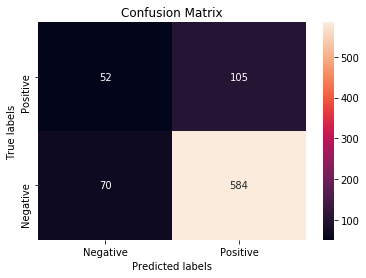

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
#cm = classification_report(y_test, y_pred_lstm)
sns.heatmap(confusion_matrix(Y, X.API_Predicted_Sentiment), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])
